In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
import numpy as np
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import tensorflow as tf
import PIL.Image
import keras.backend as K
from matplotlib import pylab as plt

%matplotlib inline

In [3]:
def show_image(image, grayscale = True, ax=None, title=''):
    if ax is None:
        plt.figure()
    plt.axis('off')
    
    if len(image.shape) == 2 or grayscale == True:
        if len(image.shape) == 3:
            image = np.sum(np.abs(image), axis=2)
            
        vmax = np.percentile(image, 99)
        vmin = np.min(image)

        plt.imshow(image, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
        plt.title(title)
    else:
        image = image + 127.5
        image = image.astype('uint8')
        
        plt.imshow(image)
        plt.title(title)
    
def load_image(file_path):
    im = PIL.Image.open(file_path)
    im = np.asarray(im)
    
    return im - 127.5

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02091831', 'Saluki', 0.19591141)] 176


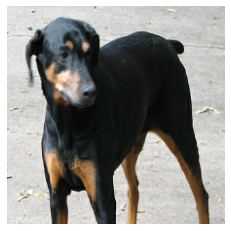

In [6]:
# Load and compile the model
model = VGG16(weights='imagenet')
model.compile(loss='mean_squared_error', optimizer='adam')

# Load an image and make the prediction
img_path = 'doberman.png'
img = load_image(img_path)
show_image(img, grayscale=False)

x = np.expand_dims(img, axis=0)

preds = model.predict(x)
label = np.argmax(preds)
print ('Predicted:', decode_predictions(preds, top=1)[0], label)

# Vanilla gradient

In [12]:
from saliency import GradientSaliency
vanilla = GradientSaliency(model)

ValueError: ignored

In [9]:
mask = vanilla.get_mask(img)
show_image(mask, ax=plt.subplot('121'), title='vanilla gradient')

mask = vanilla.get_smoothed_mask(img)
show_image(mask, ax=plt.subplot('122'), title='smoothed vanilla gradient')

NameError: ignored

# Guided backpropagation

In [11]:
from guided_backprop import GuidedBackprop
guided_bprop = GuidedBackprop(model) # A very expensive operation, which hackingly creates 2 new temp models

AttributeError: ignored

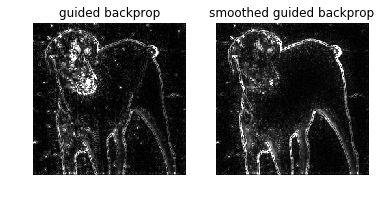

In [ ]:
mask = guided_bprop.get_mask(img)
show_image(mask, ax=plt.subplot('121'), title='guided backprop')

mask = guided_bprop.get_smoothed_mask(x[0])
show_image(mask, ax=plt.subplot('122'), title='smoothed guided backprop')

# Integrated gradient

In [13]:
from integrated_gradients import IntegratedGradients
inter_grad = IntegratedGradients(model)

ValueError: ignored

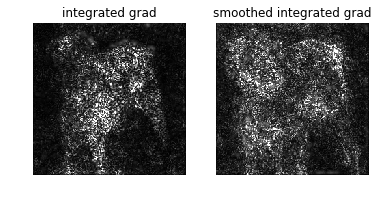

In [ ]:
mask = inter_grad.get_mask(x[0])
show_image(mask, ax=plt.subplot('121'), title='integrated grad')

mask = inter_grad.get_smoothed_mask(x[0])
show_image(mask, ax=plt.subplot('122'), title='smoothed integrated grad')

# Visual backpropagation

In [ ]:
from visual_backprop import VisualBackprop
visual_bprop = VisualBackprop(model)

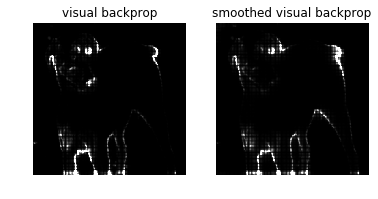

In [ ]:
mask = visual_bprop.get_mask(x[0])
show_image(mask, ax=plt.subplot('121'), title='visual backprop')

mask = visual_bprop.get_smoothed_mask(x[0])
show_image(mask, ax=plt.subplot('122'), title='smoothed visual backprop')

# Cross comparision

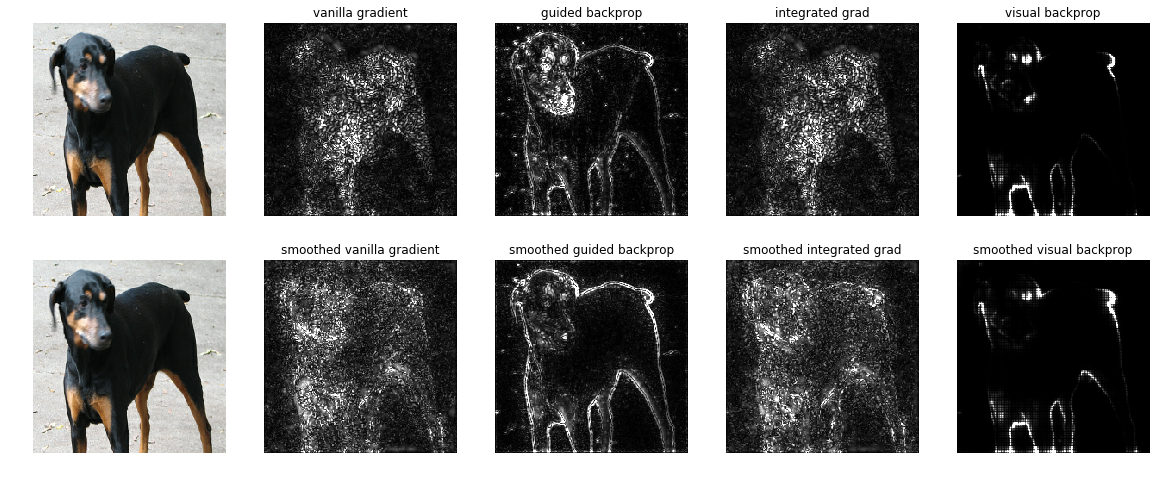

In [ ]:
plt.figure(figsize=(20,8))

# Plot non-smoothed versions
show_image(img, grayscale=False, ax=plt.subplot(251))

mask = vanilla.get_mask(img)
show_image(mask, ax=plt.subplot(252), title='vanilla gradient')

mask = guided_bprop.get_mask(img)
show_image(mask, ax=plt.subplot(253), title='guided backprop')

mask = inter_grad.get_mask(x[0])
show_image(mask, ax=plt.subplot(254), title='integrated grad')

mask = visual_bprop.get_mask(x[0])
show_image(mask, ax=plt.subplot(255), title='visual backprop')

# Plot smoothed versions
show_image(img, grayscale=False, ax=plt.subplot(256))

mask = vanilla.get_smoothed_mask(img)
show_image(mask, ax=plt.subplot(257), title='smoothed vanilla gradient')

mask = guided_bprop.get_smoothed_mask(img)
show_image(mask, ax=plt.subplot(258), title='smoothed guided backprop')

mask = inter_grad.get_smoothed_mask(x[0])
show_image(mask, ax=plt.subplot(259), title='smoothed integrated grad')

mask = visual_bprop.get_smoothed_mask(x[0])
show_image(mask, ax=plt.subplot(2,5,10), title='smoothed visual backprop')